In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

# 2
$f = ma$, $m = 1$, значит $f = a$. Т. к. в моменты $[0, 1], [1, 2],...,[9, 10]$ к частице прилагаются силы $f_i$, то скорость $v_1$ в момент $t_1$ равна $0 + \int_{0}^{1} f_1 dx = f_1$, $v_2$ в момент времени $t_2$ равна $f_1 + \int_0^1 f_2 dx = f_1+f_2$ и т. д., $v_{10}$ в момент $t_{10}$ равна $f_1+...+f_9 + \int_0^1 f_{10} dx = f_1+...+f_{10}$.

Соответственно, $x_1 = 0 + \int_0^1 f_1x dx = \frac{f_1}{2}$, $x_2 = \frac{f_1}{2} + \int_0^1 (f_1+f_2x) dx = \frac{3f_1}{2} + \frac{f_2}{2}$, $x_3 = \frac{3f_1}{2} + \frac{f_2}{2} + \int_0^1 (f_1+f_2+f_3x)dx = \frac{5f_1}{2} + \frac{3f_2}{2} + \frac{f_3}{2}$,..., $x_{10} = \frac{19f_1}{2} + \frac{17f_2}{2} + ... +\frac{f_{10}}{2}$
Таким образом, матрица $A$ состоит из 2-х вектор-строк $a_1 = (1, 1,...,1)$ и $a_2 = (\frac{19}{2}, \frac{17}{2}, \frac{15}{2},...,\frac{1}{2})$.

Вычислим SVD разложение матрицы $A$.

In [ ]:
a = np.array([1, 0])
A = np.array([[(2*j+1)/2 for j in reversed(range(10))], [1 for i in range(10)]])
U, S, Vh = np.linalg.svd(A)
w = np.zeros(10)
w[0] = (U.T @ a)[0] / S[0]
w[1] = (U.T @ a)[1] / S[1]
# w - вектор минимальной нормы, соответствующий решению уравнения S @ y = U*b, где y = Vh @ f
# Норма Vh @ f равна норме f, т. к.  Vh - ортогональное преобразование, значит f_opt находится из решения Vh @ f = w
f_opt = Vh.T @ w
#Вектор минимальной нормы и его норма:
print(f_opt)
print((sum(f_opt**2))**(1/2))

[ 0.05454545  0.04242424  0.03030303  0.01818182  0.00606061 -0.00606061
 -0.01818182 -0.03030303 -0.04242424 -0.05454545]
0.11009637651263604


In [ ]:
n = np.random.uniform(0,6,7)
e = np.random.normal(loc=0.0, scale=1.0, size=7)
f = 10*np.sin(n) + e
print(n)

[0.38210797 3.64547095 4.50400712 5.24198073 0.99129183 0.75854145
 5.17739082]


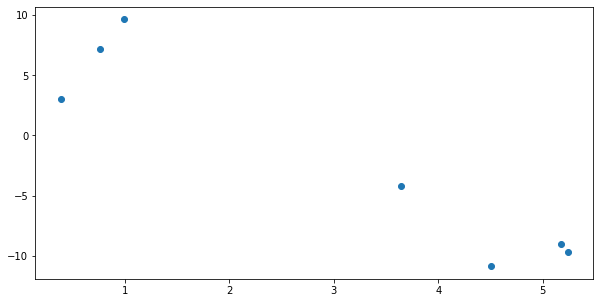

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = n, y = f)

In [ ]:
#Линейная модель
A = np.zeros((7,2))
for i in range(7):
  A[i][0] += 1
  A[i][1] += n[i]
lin_ls = np.linalg.inv(A.T @ A) @ A.T @ f
print(lin_ls)
y_lin = [lin_ls[1]*n[i] + lin_ls[0] for i in range(7)]

[ 8.93963972 -3.69440358]


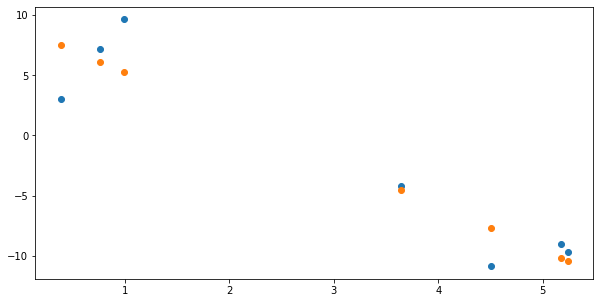

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = n, y = f)
ax.scatter(x = n, y = y_lin)

In [ ]:
#Полиномиальная модель
A = np.zeros((7,4))
for i in range(7):
  for j in range(4):
    A[i][j] += n[i]**j
pol_ls = np.linalg.inv(A.T @ A) @ A.T @ f
y_pol = [[sum(pol_ls[j]*n[i]**j for j in range(4))] for i in range(7)]

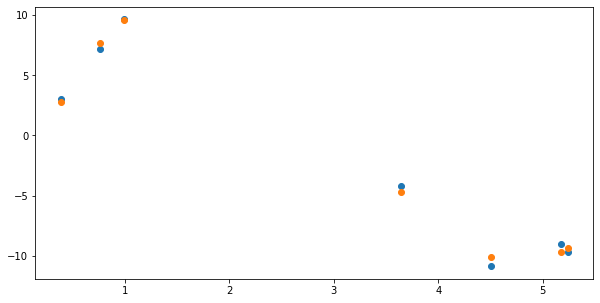

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = n, y = f)
ax.scatter(x = n, y = y_pol)

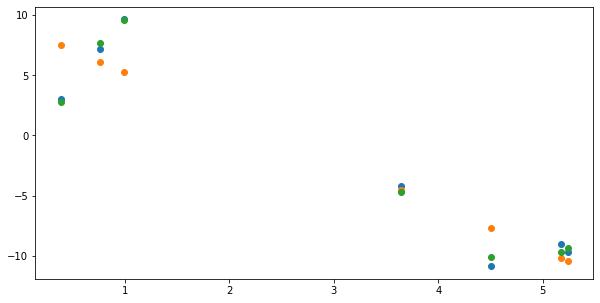

In [ ]:
#Все на одном графике
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x = n, y = f)
ax.scatter(x = n, y = y_lin)
ax.scatter(x = n, y = y_pol)

In [ ]:
with np.load('data.npz') as data:
  A, C = data['A'], data['C']

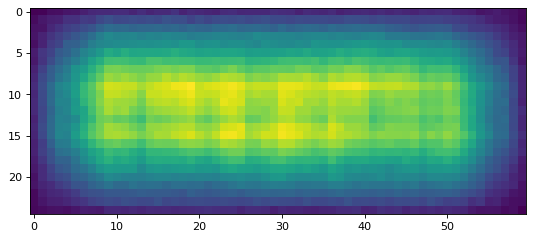

In [ ]:
figure(figsize=(8, 6), dpi=80)
plt.imshow(A, interpolation='none')

In [ ]:
s = []
for i in range(1500):
  s1 = 0
  for j in range(816):
    s1 += C[i][j]
  s.append(s1)
print(s)

1500


In [ ]:
def mat2vec(A):
  A = np.flipud(A)
  a = np.reshape(A, np.prod(A.shape))
  return a


def vec2mat(a, shape):
  A = np.reshape(a, shape)
  A = np.flipud(A)
  return A

In [ ]:
#Приблизим вектор a0, решив систему Ca0 = a с помощью SVD разложения
a = mat2vec(A)
U1, S1, Vh1 = np.linalg.svd(C)
S1 = np.diag(S1)
a0 = Vh1.T @ np.linalg.inv(S1) @ (U1.T @ a)[0:816]

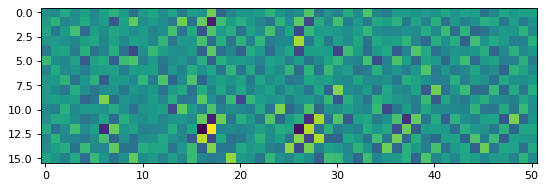

In [ ]:
A0 = vec2mat(a0, (16, 51))
figure(figsize=(8, 6), dpi=80)
plt.imshow(A0, interpolation='none')

In [ ]:
#Приблизим вектор a0 с помощью метода наименьших квадратов, используя только часть сингулярных чисел в SVD разложении
U1, S1, Vh1 = np.linalg.svd(C)
w1 = np.zeros(816)
k = 404
for i in range(k):
  w1[i] = (U1.T @ a)[i] / S1[i]
a0_1 = Vh1.T @ w1

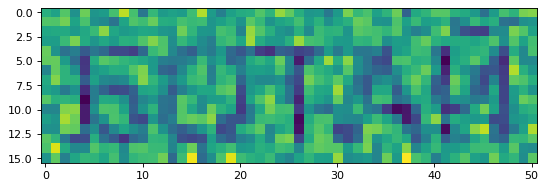

In [ ]:
A0_1 = vec2mat(a0_1, (16, 51))
figure(figsize=(8, 6), dpi=80)
plt.imshow(A0_1, interpolation='none')

# 5
Исходная задача минимизации эквивалентна задачи минимизации функции $\frac{1}{2}||Ax-b||^2$ при условии $Cx = 0$. Положим, матрица $A$ имеет размер $m\times n$, а матрица $C$ - $k\times n$
Выпишем лагранжиан данной задачи:
$$L(x, \lambda) = \frac{1}{2}||Ax-b||^2 +\lambda_1(c_{11}x_1+...+c_{1n}x_n) +...+ \lambda_m(c_{m1}x_1+...+c_{mn}x_n)$$
$$\nabla L(x, \lambda) = 0 \Leftrightarrow$$
\begin{equation*}
 \begin{cases}
  A^T(Ax-b) = C^T\lambda,
   \\
   Cx = 0
 \end{cases}
\end{equation*}

$$\Rightarrow$$
\begin{equation*}
 \begin{cases}
  A^TAx = A^Tb + C^T\lambda,
   \\
   Cx = 0
 \end{cases}
\end{equation*}

$$\Rightarrow$$
\begin{equation*}
 \begin{cases}
  x = (A^TA)^{-1}A^Tb + (A^TA)^{-1}C^T\lambda,
   \\
   Cx = 0
 \end{cases}
\end{equation*}

$$\Rightarrow$$
\begin{equation*}
 \begin{cases}
  x = (A^TA)^{-1}A^Tb + (A^TA)^{-1}C^T\lambda,
   \\
   C(A^TA)^{-1}A^Tb = C(A^TA)^{-1}C^T\lambda
 \end{cases}
\end{equation*}

$$\Rightarrow \lambda = (C(A^TA)^{-1}C^T)^{-1}C(A^TA)^{-1}A^Tb$$
Соответственно $x = (A^TA)^{-1}(A^Tb + C^T(C(A^TA)^{-1}C^T)^{-1}C(A^TA)^{-1}A^Tb)$

#6
Если считать, что разность между истинными координатами и данными достаточно мала, то можно не учитывать квадратичные слагаемые с переменными:
$$<a, b>^2 = <a,a><b,b>cos^2(\theta_{ab}) \Leftrightarrow (<a'+\Delta_1, b'+\Delta_2>)^2 = <a'+\Delta_1,a'+\Delta_1><b'+\Delta_2, b'+\Delta_2>cos^2(\theta_{ab}) \Leftrightarrow \approx (<a', b'> +<a',\Delta_2>+<b',\Delta_1>)^2 = (<a', a'> +2<a',\Delta_1>)(<b',b'>+2<b',\Delta_2>)cos^2(\theta_{ab}) = cos^2(\theta_{ab})<a', a'><b',b'>+2cos^2(\theta_{ab})<a',\Delta_1><b',b'>+2cos^2(\theta_{ab})<a', a'><b',\Delta_2> +4cos^2(\theta_{ab})<a',\Delta_1><b',\Delta_2> \approx cos^2(\theta_{ab})<a', a'><b',b'> + 2cos^2(\theta_{ab})<b',b'>a'_x\Delta^x_1 + 2cos^2(\theta_{ab})<b',b'>a'_y\Delta^y_1 + 2cos^2(\theta_{ab})<a',a'>b'_x\Delta^x_2 + 2cos^2(\theta_{ab})<a',a'>b'_y\Delta^y_2$$

Отсюда получаем:
$$(<a', b'> +a'_x\Delta^x_2+a'_y\Delta^y_2+b'_x\Delta^x_1+b'_y\Delta^y_1)^2 = cos^2(\theta_{ab})<a', a'><b',b'> + 2cos^2(\theta_{ab})<b',b'>a'_x\Delta^x_1 + 2cos^2(\theta_{ab})<b',b'>a'_y\Delta^y_1 + 2cos^2(\theta_{ab})<a',a'>b'_x\Delta^x_2 + 2cos^2(\theta_{ab})<a',a'>b'_y\Delta^y_2 \Leftrightarrow \approx <a', b'><a', b'>+2<a', b'>a'_x\Delta^x_2+2<a', b'>a'_y\Delta^y_2+2<a', b'>b'_x\Delta^x_1+2<a', b'>b'_y\Delta^y_1 = cos(\theta_{ab})<a', a'><b',b'> + 2cos^2(\theta_{ab})<b',b'>a'_x\Delta^x_1 + 2cos^2(\theta_{ab})<b',b'>a'_y\Delta^y_1 + 2cos^2(\theta_{ab})<a',a'>b'_x\Delta^x_2 + 2cos^2(\theta_{ab})<a',a'>b'_y\Delta^y_2$$